# Predicting User Religion from OKCupid Profile Data Using Machine Learning Methods

This analysis attempts to answer the question of whether user religion can be reliably predicted from other user-inputted OKCupid data. Based on results, an algorithmic solution could impute missing religion data when matching. Chosen machine learning methods from scikit-learn include LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifer. The data comes from a publicly-available dataset published in the Journal of Statistics Education, Volume 23, Number 2 (2015) by Albert Y. Kim et al. Evaluation will conclude with validation metrics such as accuracy, precision, and recall, as well as a confusion matrix. 

## Import modules and data

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load data

In [2]:
okcupid = pd.read_csv('okcupid_profiles.csv', encoding='utf-8')
okcupid.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


## Inspect data

In [3]:
okcupid.shape

(59946, 31)

In [4]:
list(okcupid.columns) 

['age',
 'status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'religion',
 'sign',
 'smokes',
 'speaks',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9']

In [5]:
okcupid['religionCleaned'] = okcupid.religion.str.split().str.get(0)
print("number of religions:",okcupid.religionCleaned.nunique())
okcupid.religionCleaned.value_counts()

number of religions: 9


agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religionCleaned, dtype: int64

Christianity seems to be the largest traditional religion, especially when combined with Catholicism. Shades of non-belief, however, make up the majority.

### Age histograms

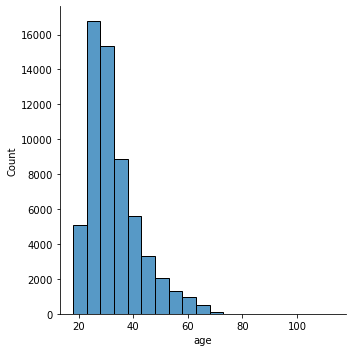

In [6]:
sns.displot(data=okcupid, x="age", kind="hist", binwidth = 5);

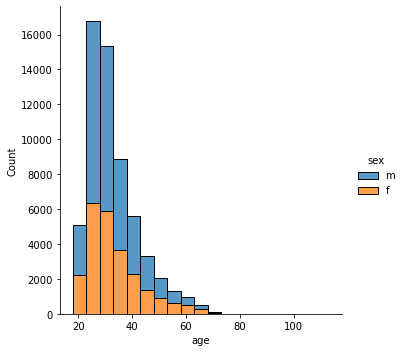

In [7]:
sns.displot(data=okcupid, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

Central tendency of age appears to be late 20s. There appear to be more men on OKCupid than women.

### Height histograms

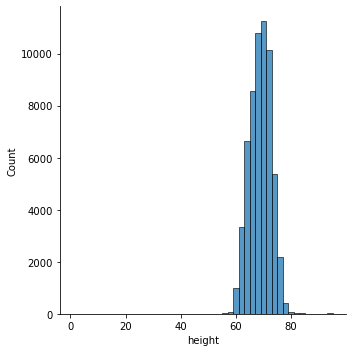

In [9]:
sns.displot(data=okcupid, x="height", kind="hist", binwidth = 2);

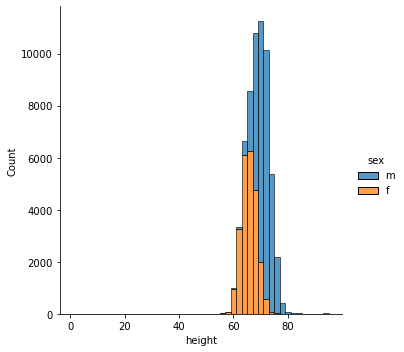

In [10]:
sns.displot(data=okcupid, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

### Income histogram

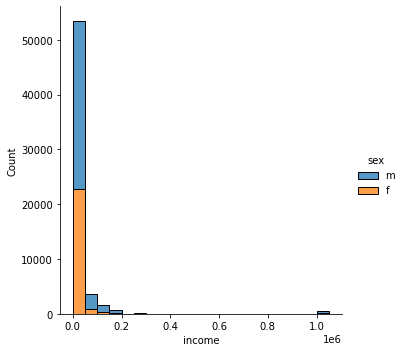

In [11]:
sns.displot(data=okcupid, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

By far, average incomes are below $50,000, which may be surprising.

### Sex bar chart

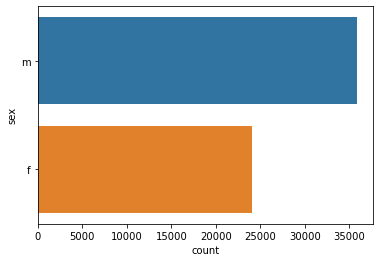

In [12]:
sns.countplot(data=okcupid, y="sex");

### Body type bar chart

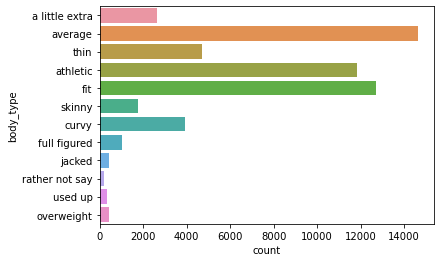

In [14]:
sns.countplot(data=okcupid, y="body_type");

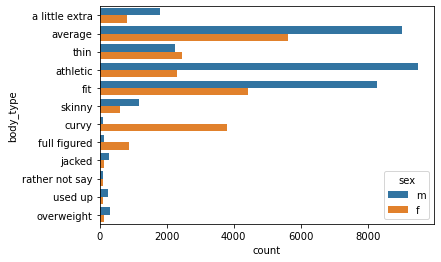

In [15]:
sns.countplot(data=okcupid, y="body_type", hue = "sex");

### Diet bar chart

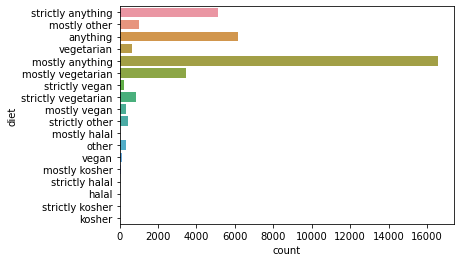

In [16]:
sns.countplot(data=okcupid, y="diet");

### Alcohol consumption bar chart

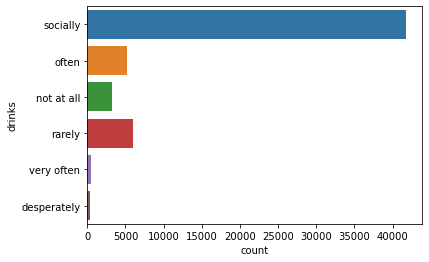

In [17]:
sns.countplot(data=okcupid, y="drinks");

### Recreational drug usage bar chart

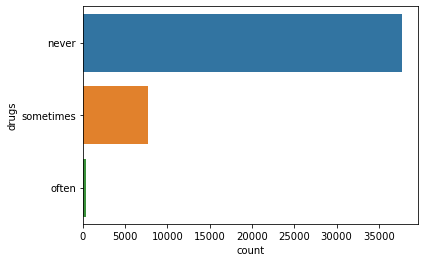

In [18]:
sns.countplot(data=okcupid, y="drugs");

### Education bar chart

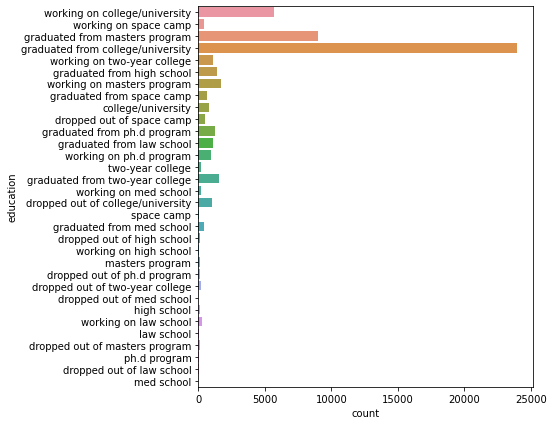

In [19]:
plt.figure(figsize=(6,7))

sns.countplot(data=okcupid, y="education");

### Employment bar chart

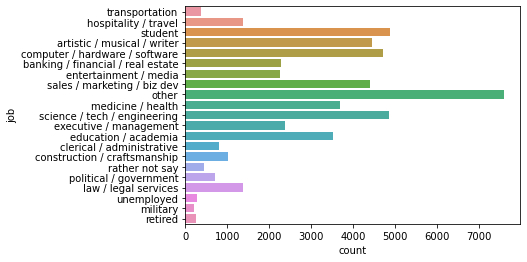

In [20]:
sns.countplot(data=okcupid, y="job");

### Desire for parenthood bar chart

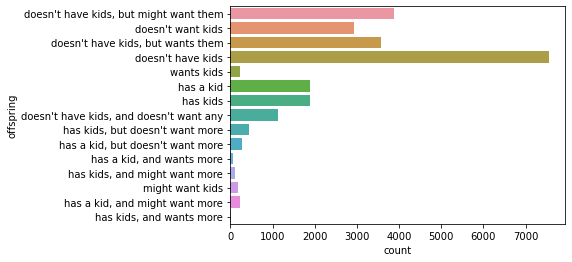

In [21]:
sns.countplot(data=okcupid, y="offspring");

### Sexual orientation bar charts

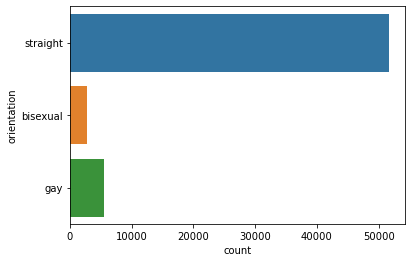

In [22]:
sns.countplot(data=okcupid, y="orientation");

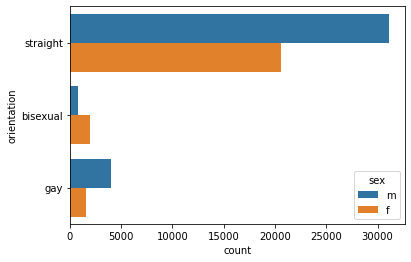

In [23]:
sns.countplot(data=okcupid, y="orientation", hue = "sex");

### Pets preference bar chart

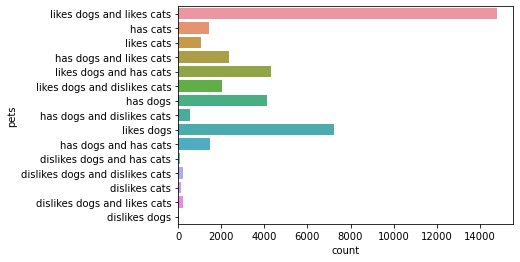

In [24]:
sns.countplot(data=okcupid, y="pets");

### Religious identification bar chart

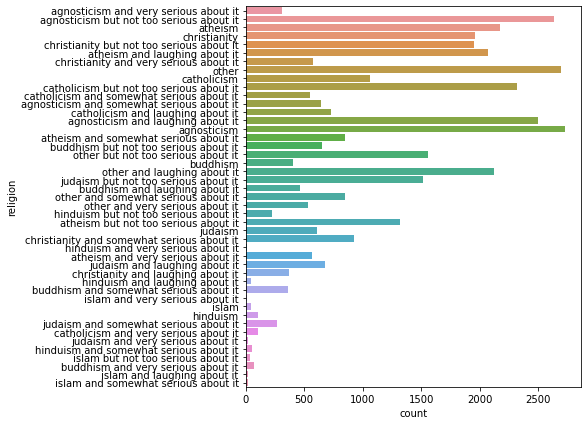

In [25]:
plt.figure(figsize=(6,7))
sns.countplot(data=okcupid, y="religion");

religion was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists. 

### Zodiac signs bar chart

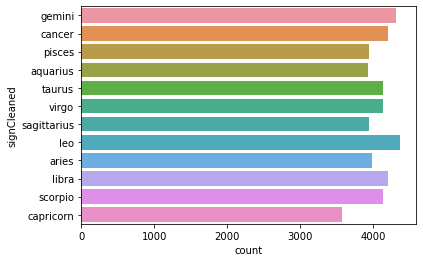

In [30]:
okcupid['signCleaned'] = okcupid.sign.str.split().str.get(0)
sns.countplot(data=okcupid, y="signCleaned");

### Smoking habits bar chart

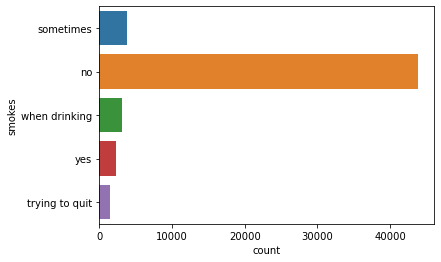

In [31]:
sns.countplot(data=okcupid, y="smokes");

### Relationship status

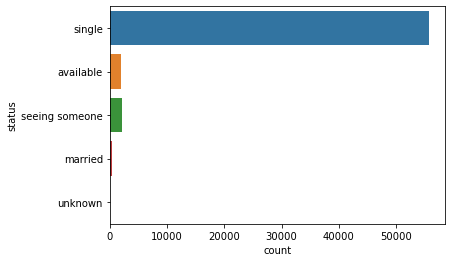

In [33]:
sns.countplot(data=okcupid, y="status");

## Clean data


Machine learning algorithms often perform poorly in the presence of missing values. If missing values exist, they should be removed or a new, appropriate value should be imputed.

In [34]:
okcupid.isnull().sum()

age                    0
status                 0
sex                    0
orientation            0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
pets               19921
religion           20226
sign               11056
smokes              5512
speaks                50
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
religionCleaned    20226
signCleaned        11056
dtype: int64

To accurately predict religion, the machine learning model should prune some variables from the data so that only those that might predict religion are included.

In [73]:
features = ['income', 'orientation', 'drinks', 'drugs', 'job', 'education', 'ethnicity', 'offspring', 'religionCleaned']
okcupid_prepped = okcupid[features].dropna()
okcupid_prepped.shape

(12364, 9)

Dummy variables should be created for all categorical variables in order to turn each category into a binary identifier.

In [75]:
for feature in features[:-1]:
    okcupid_prepped = pd.get_dummies(okcupid_prepped, columns=[feature], prefix = [feature])

In [76]:
okcupid_prepped.head()

,religionCleaned,income_-1,income_20000,income_30000,income_40000,income_50000,income_60000,income_70000,income_80000,income_100000,...,offspring_has a kid,"offspring_has a kid, and might want more","offspring_has a kid, and wants more","offspring_has a kid, but doesn't want more",offspring_has kids,"offspring_has kids, and might want more","offspring_has kids, and wants more","offspring_has kids, but doesn't want more",offspring_might want kids,offspring_wants kids
0,agnosticism,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,agnosticism,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,christianity,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,catholicism,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,catholicism,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Machine learning models often encounter problems when the prediction label is dividied in an unbalanced way. Without enough or representative data for each possible outcome, the model will be trained to give bad predictions. 

In [77]:
okcupid_prepped.religionCleaned.value_counts()

agnosticism     2523
other           2456
christianity    2124
atheism         2085
catholicism     1580
judaism          826
buddhism         610
hinduism         111
islam             49
Name: religionCleaned, dtype: int64

## Split data

The training set will be 25% of the data. The remainder will be included in the validation set. It is customary to call the prediction label Y and the other variables X

In [78]:
col_length = len(okcupid_prepped.columns)

X = okcupid_prepped.iloc[:, 1:col_length]
Y = okcupid_prepped.iloc[:, 0:1]
validation = 0.25

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = validation, random_state = 0)

#.ravel as in "unravel." This method flattens the arrays into one dimension
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

## Build models and make predictions 

### Evaluation metrics

Models can be evaluated according to several metrics. Run classification_report from sklearn after models finish in order to see these numbers.

- Accuracy (correct values divided by total values)
- Precision (true positives divided by actual positive values)
- Recall (true positives divided by positive guesses)
- F1-score (a score that blends precision and recall in order to balance both values)
- Macro Avg (the unweighted mean value of precision and recall)
- Weighted Avg (the mean value of precision and recall weighted by supports--the number of observations to predict in a class)

### Logistic regression

In [83]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [84]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

 agnosticism       0.30      0.37      0.33      1862
     atheism       0.38      0.42      0.40      1578
    buddhism       0.24      0.05      0.09       455
 catholicism       0.46      0.33      0.38      1200
christianity       0.37      0.45      0.41      1621
    hinduism       0.55      0.67      0.60        88
       islam       0.64      0.18      0.28        39
     judaism       0.29      0.12      0.17       620
       other       0.34      0.37      0.36      1810

    accuracy                           0.36      9273
   macro avg       0.40      0.33      0.33      9273
weighted avg       0.35      0.36      0.35      9273



A random guess should be correct roughly one out of every 12 guesses. With a macro average of 36%, the logistic regression performed fairly well.

### K nearest neighbors classifier

The default value for the n_neighbors parameter is typically 5, though it can be tuned later, if needed.

In [85]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [86]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

 agnosticism       0.38      0.64      0.48      1862
     atheism       0.45      0.53      0.49      1578
    buddhism       0.46      0.22      0.30       455
 catholicism       0.45      0.45      0.45      1200
christianity       0.52      0.42      0.47      1621
    hinduism       0.74      0.45      0.56        88
       islam       1.00      0.05      0.10        39
     judaism       0.42      0.23      0.30       620
       other       0.53      0.35      0.42      1810

    accuracy                           0.45      9273
   macro avg       0.55      0.37      0.40      9273
weighted avg       0.47      0.45      0.44      9273



The KNeighborsClassifier outperforms the logistic regression at nearly 50%

### Decision tree classifier

A CART (Classification and Regression Tree) is a decision tree where each node contains a label prediction

In [87]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [88]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

 agnosticism       0.70      0.90      0.79      1862
     atheism       0.80      0.84      0.82      1578
    buddhism       0.83      0.81      0.82       455
 catholicism       0.82      0.77      0.79      1200
christianity       0.83      0.79      0.81      1621
    hinduism       0.96      0.88      0.92        88
       islam       1.00      0.92      0.96        39
     judaism       0.77      0.59      0.67       620
       other       0.92      0.78      0.84      1810

    accuracy                           0.80      9273
   macro avg       0.85      0.81      0.82      9273
weighted avg       0.81      0.80      0.80      9273



At 80%, the CART model outperforms both other models by a factor of almost two. A confusion matrix will help confirm results.

In [89]:
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

The y axis plots true values and the x axis plots predicted values. Everything plotted along the diagonal is plotted against itself, representing correct algorithmic guesses.

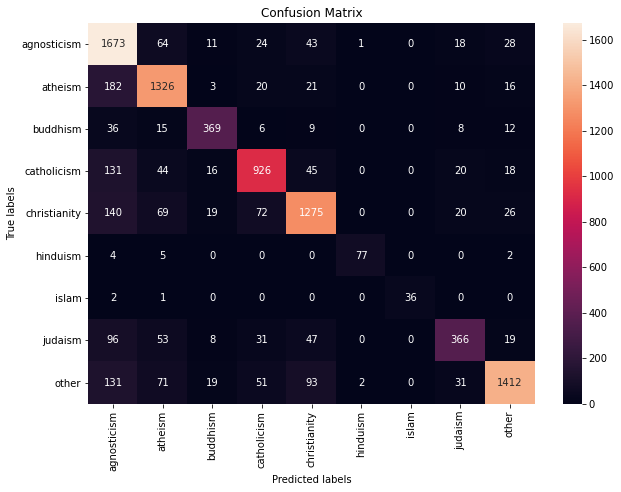

In [91]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

As Islam, Hinduism, and Buddhism were underrepresented in the input data, predictive power is shown to be weaker for them compared to non-belief and Christianity/Catholicism.

In [92]:
cart_model.get_depth()

81

Because the CART model has a depth of 81 branches, it appears to have overfit the data, meaning that it probably cannot be used for another dataset. Re-training it with a maximum depth of 20 should help it be more generalizable to other datasets.

In [93]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [94]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

 agnosticism       0.45      0.66      0.54      1862
     atheism       0.59      0.64      0.61      1578
    buddhism       0.79      0.41      0.54       455
 catholicism       0.70      0.43      0.53      1200
christianity       0.47      0.62      0.53      1621
    hinduism       0.91      0.78      0.84        88
       islam       1.00      0.49      0.66        39
     judaism       0.51      0.30      0.37       620
       other       0.69      0.48      0.56      1810

    accuracy                           0.55      9273
   macro avg       0.68      0.53      0.58      9273
weighted avg       0.58      0.55      0.55      9273



Indeed, the accuracy has suffered (55%, down from 80%). To determine if the new results are adequate, cross-validation communicates whether the model is generalizable to other data. If our model exceeds the baseline, it is usable.

In [97]:
cross_val = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(cross_val)
print("Baseline: %.2f%% (%.2f%%)" % (cross_val.mean()*100, cross_val.std()*100))

[0.25444744 0.27816712 0.25929919 0.26914779 0.25782093]
Baseline: 26.38% (0.87%)


Finally, we can validate with the remaining 75% of our data.

In [98]:
lr_validation = lr_model.predict(X_val)
print(classification_report(Y_val, lr_validation))

              precision    recall  f1-score   support

 agnosticism       0.28      0.32      0.30       661
     atheism       0.32      0.37      0.35       507
    buddhism       0.16      0.04      0.06       155
 catholicism       0.41      0.31      0.35       380
christianity       0.34      0.43      0.38       503
    hinduism       0.42      0.57      0.48        23
       islam       0.20      0.10      0.13        10
     judaism       0.16      0.07      0.10       206
       other       0.35      0.36      0.35       646

    accuracy                           0.32      3091
   macro avg       0.29      0.28      0.28      3091
weighted avg       0.31      0.32      0.31      3091



In [99]:
knn_validation = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_validation))

              precision    recall  f1-score   support

 agnosticism       0.23      0.38      0.29       661
     atheism       0.24      0.30      0.27       507
    buddhism       0.14      0.05      0.08       155
 catholicism       0.24      0.24      0.24       380
christianity       0.30      0.24      0.27       503
    hinduism       0.33      0.17      0.23        23
       islam       0.00      0.00      0.00        10
     judaism       0.11      0.07      0.09       206
       other       0.26      0.16      0.20       646

    accuracy                           0.24      3091
   macro avg       0.21      0.18      0.18      3091
weighted avg       0.24      0.24      0.23      3091



In [100]:
cart_validation = cart_model.predict(X_val)
print(classification_report(Y_val, cart_validation))

              precision    recall  f1-score   support

 agnosticism       0.24      0.31      0.27       661
     atheism       0.23      0.25      0.24       507
    buddhism       0.10      0.08      0.09       155
 catholicism       0.25      0.22      0.23       380
christianity       0.26      0.27      0.26       503
    hinduism       0.33      0.39      0.36        23
       islam       0.00      0.00      0.00        10
     judaism       0.08      0.06      0.07       206
       other       0.25      0.20      0.23       646

    accuracy                           0.23      3091
   macro avg       0.19      0.20      0.19      3091
weighted avg       0.23      0.23      0.23      3091



Surprisingly, validation refutes our assumptions and reveals logistic regression to be the most accurately predictive model at 32%, though that is not a terribly high. Now for a final confusion matrix visualization of the winning model:

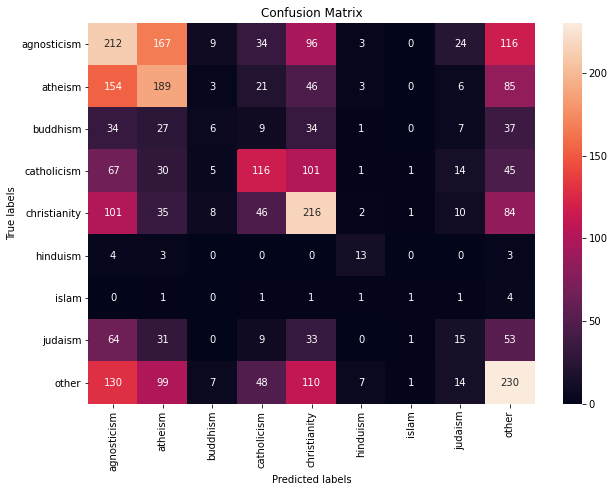

In [101]:
confusion = confusion_matrix(Y_val, lr_validation)
lr_labels = lr_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(lr_labels); 
ax.yaxis.set_ticklabels(lr_labels);

## Conclusion


#### General Comments

Ultimately, the logistic regression best predicts the Christianity and other categories. It fairly often confuses agnosticism and atheism, though it also predicts them correctly often enough. It most often confuses Christianity for Catholicism. The model does not have good predictive power for Judaism, Islam, Hinduism, or Buddhism, likely because the input data was slightly imbalanced.

The business use case could be to predict religion when users don't input it, though that goal may be a non-starter due to the dangers of algorithmic bias. Imputed data may help potential partners find each other, based on similar demographics, but more investigation is needed for how to accomplish this in an acceptable way.

Next steps would be to add additional models to possibly increase predictive power or tune the above hyperparameters for potential improvement. 